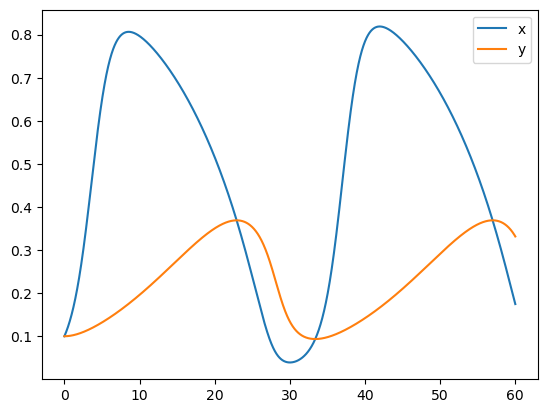

In [2]:
from Helpers.solvers import solve_to
import numpy as np

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])

t, y = solve_to(ode, 0, [0.1, 0.1], t_max=60, n_max=None, method='RK4', deltat_max=0.01)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(t, y[:,0], label='x')
plt.plot(t, y[:,1], label='y')
plt.legend()
plt.show()

In [114]:
from Helpers.solvers import solve_to
import numpy as np
from scipy.optimize import root, fsolve

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.2):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])


# Define the phase function and the condition
def phase_function(t, y):
    dx, dy = ode(t, y)
    return dx


# Set up the shooting method
def func(U0):
    x0, y0, T = U0

    t, y = solve_to(ode, 0, np.array([x0, y0]), t_max=T)

    phase_value = phase_function(0, np.array([x0, y0]))

    condition1 = y[-1,0] - x0                 # x(T) - x(0) = 0
    condition2 = y[-1,1] - y0                 # y(T) - y(0) = 0
    condition3 = phase_value                  #    dx/dt(T) = 0

    return condition1, condition2, condition3

# Initial guess
guess = np.array([0.6, 0.6, 34])
sol = root(func, guess)
print(sol)
x0, y0, T = sol.x
print('x0 = {}, y0 = {}, T = {}'.format(x0, y0, T))

    fjac: array([[-0.97648805, -0.21427503,  0.02360719],
       [ 0.16819032, -0.82578107, -0.53832857],
       [-0.13484474,  0.52170091, -0.84240433]])
     fun: array([ 6.14632424e-05,  1.57494006e-05, -4.27571283e-06])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([ 2.93160786e-04, -3.23785551e-05, -1.58628948e-06])
       r: array([   4.6136099 ,   -2.60128003, -809.24431772,    1.46481965,
       -550.21967493,  649.54025499])
  status: 1
 success: True
       x: array([ 0.27014466,  0.27015792, 34.00031986])
x0 = 0.2701446647991342, y0 = 0.2701579168619234, T = 34.00031986255984


0.008072981265857732


(-0.0008526849072377773, -0.05741237972763941, 0.008072981265857732)

3402 3402


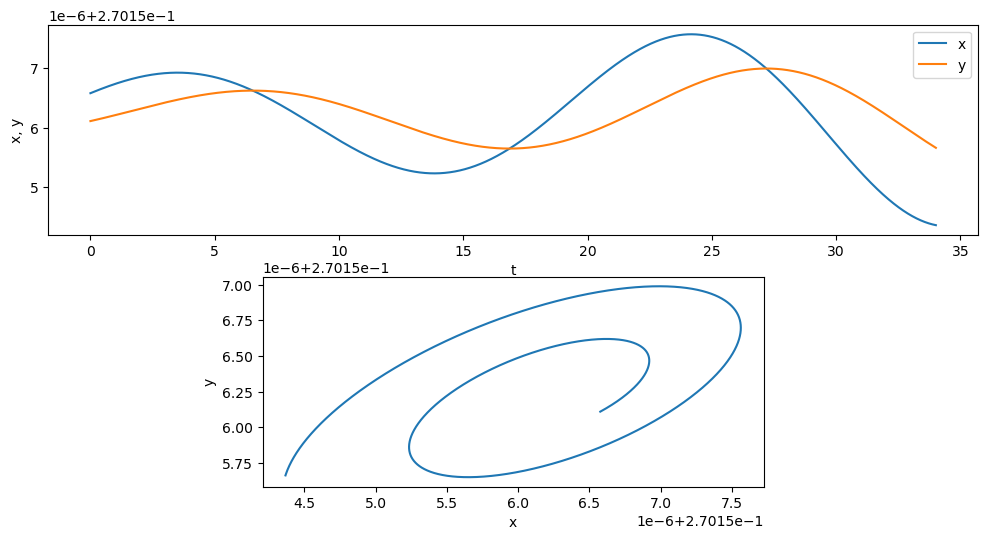

In [113]:
t, y = solve_to(ode, 0, [x0, y0], t_max=T, n_max=None, method='RK4', deltat_max=0.01)
print(len(t), len(y))
# Plot the results. x,y vs t. x vs y
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(t, y[:,0], label='x')
ax[0].plot(t, y[:,1], label='y')
ax[0].legend()
ax[0].set_xlabel('t')
ax[0].set_ylabel('x, y')

ax[1].plot(y[:,0], y[:,1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_aspect('equal', 'box')

plt.show()

In [75]:
t_start = 0.9
t, y = solve_to(ode, t_start, [x0, y0], t_max=T+t_start, n_max=None, method='RK4', deltat_max=0.01)

deltas = phase_function(t, y)
print(deltas)

t = [ 0.9   0.91  0.92 ... 34.95 34.96 34.97], y = [[0.70195893 0.26989664]
 [0.70168851 0.27006277]
 [0.70141784 0.27022889]
 ...
 [0.7025001  0.2696071 ]
 [0.7022298  0.26977324]
 [0.70195926 0.26993937]]
dx = [-4.04979103e-01  1.05775713e-08], dy = [ 2.70314093e-05 -1.66225326e-05]
[-4.04979103e-01  1.05775713e-08]


In [ ]:

def fun(X0):
    x0, y0, T = X0

    ode.t_max = T
    t, y = ode.solve_to(np.array([x0, y0]))
    
    x_end = y[-1, 0]
    y_end = y[-1, 1]
    
    deltas = phase_function(x_end, y_end)

    condition1 = x_end - x0
    condition2 = y_end - y0
    condition3 = deltas

    print('Conditions: ', condition1, condition2, condition3)

    return np.array([condition1, condition2, condition3])

from scipy.optimize import fsolve, root

sol = root(fun, [0.4, 0.3, 20])
print(sol)